In [21]:
import random
import math as m
import numpy as np

b=int(input("Enter number of bandits : "))
t=int(input("Enter of number of games : "))
u=[]
n=[]
ucb=[]
Q = []
for i in range(0,b):
    u.append(0)
    n.append(1)
    ucb.append(0)
    Q.append(0)
print(u)
print(n)
print(ucb)
print(Q)

for x in range(1,t+1):
    prob_reward = random.randint(0,50)
    u.append(prob_reward)
    ucb[i] = u[i]+2*(m.sqrt(m.log(t)//n[i]))
    j=np.argmax(ucb)
    print("Probability reward after game ",x, "is ", u)
    n[j]=n[j]+1
    u[j]=u[j]+((prob_reward-u[j])//n[j])
    ##Q[i+1]=Q[i]+((u[i]-Q[i])/i)
    ##print("Sample average after game ",x,"is", Q)

Enter number of bandits :  5
Enter of number of games :  5


[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
Probability reward after game  1 is  [0, 0, 0, 0, 0, 26]
Probability reward after game  2 is  [0, 0, 0, 0, 13, 26, 32]
Probability reward after game  3 is  [0, 0, 0, 0, 19, 26, 32, 14]
Probability reward after game  4 is  [0, 0, 0, 0, 17, 26, 32, 14, 20]
Probability reward after game  5 is  [0, 0, 0, 0, 17, 26, 32, 14, 20, 33]


In [23]:
import random
import math as m
import numpy as np

b=int(input("Enter number of bandits : "))
t=int(input("Enter of number of games : "))
u=[]
n=[]
ucb=[]
Q = []
for i in range(0,b):
    u.append(0)
    n.append(1)
    ucb.append(0)
    Q.append(0)
print(u)
print(n)
print(ucb)
print(Q)

for x in range(0,t):
    for y in range(0,b):
        prob_reward = random.randint(0,50)
        u[y]=prob_reward
        ucb[i] = u[i]+2*(m.sqrt(m.log(t)/n[i]))
print(u)
print(ucb)
        


    

Enter number of bandits :  5
Enter of number of games :  3


[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[38, 8, 31, 41, 23]
[0, 0, 0, 0, 25.096294147936412]


Enter number of bandits (arms):  10
Enter number of games:  1000
Enter epsilon for exploration probability (0 to 1):  0.5


True reward probabilities: [0.041584054766469536, 0.00565577244493265, 0.3704528117226812, 0.9964566864471448, 0.5316584562579298, 0.34606026826842773, 0.6903055027046207, 0.7574067952865627, 0.34022110935329586, 0.031544160686268086]
Number of times Optimal action was chosen :  555


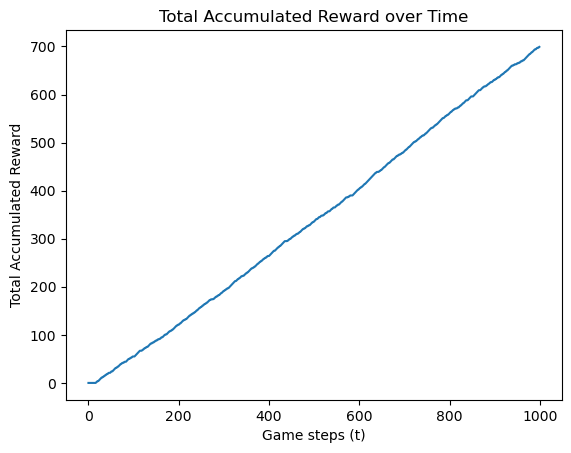

Percentage of times the optimal action was chosen: 55.50%


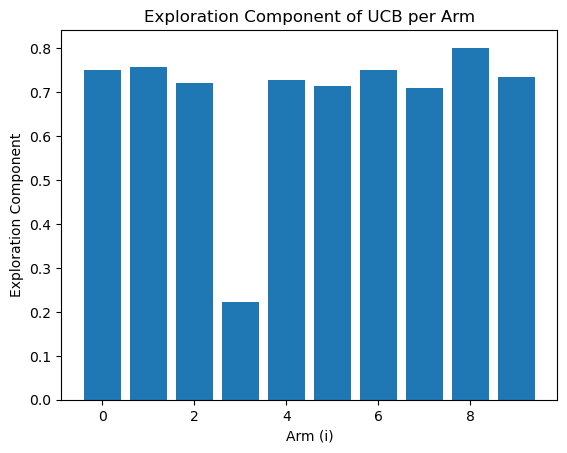

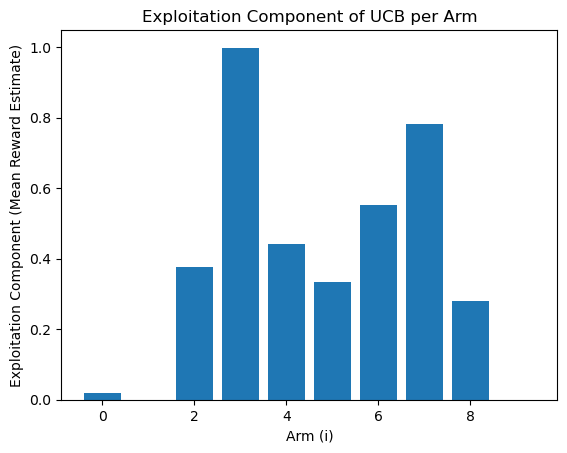

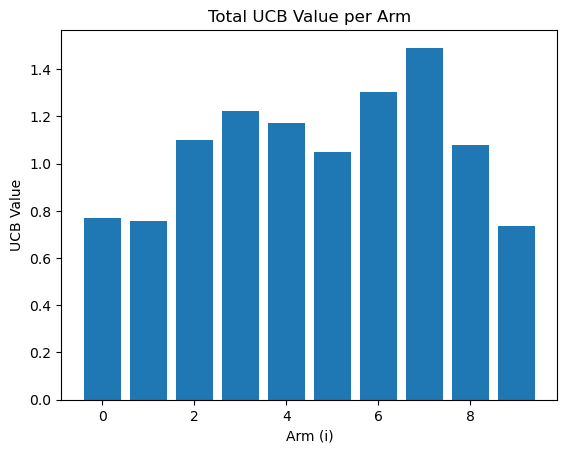

In [15]:
import random
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
b = int(input("Enter number of bandits (arms): "))
t = int(input("Enter number of games: "))
epsilon = float(input("Enter epsilon for exploration probability (0 to 1): "))

u = []       # True reward probabilities for each arm
n = []       # Count of times each arm has been pulled
Q = []       # Estimated Q-values (mean reward) for each arm
total_rewards = []  # Track total accumulated rewards over time
optimal_action_count = 0  # Count of how many times the optimal action is chosen

# Initialize arm values
for i in range(b):
    u.append(random.uniform(0, 1))  # True reward distribution (random between 0 and 1)
    n.append(1)  # Initial count of pulling each arm (set to 1 to avoid division by 0)
    Q.append(0)  # Initial Q-value (estimated mean reward)
    
print("True reward probabilities:", u)

# Track UCB components and rewards
ucb_values = np.zeros(b)
accumulated_reward = 0
optimal_rewards = 0

# Main loop for each game (t-th step)
for step in range(1, t + 1):
    if random.uniform(0, 1) < epsilon:
        # Exploration: Choose a random arm with probability epsilon
        chosen_arm = random.randint(0, b - 1)
    else:
        # Exploitation: Choose the arm with the highest Q-value (exploitation)
        chosen_arm = np.argmax(Q)
    
    # Pull the chosen arm and get a reward from the true probability distribution
    reward = 1 if random.random() < u[chosen_arm] else 0
    accumulated_reward += reward
    total_rewards.append(accumulated_reward)
    
    # Track if the optimal arm (arm with highest true reward) was chosen
    optimal_arm = np.argmax(u)
    if chosen_arm == optimal_arm:
        optimal_action_count += 1
    
    # Update the number of times the arm was pulled
    n[chosen_arm] += 1
    
    # Update the estimated Q-value (mean reward) for the chosen arm
    Q[chosen_arm] += (reward - Q[chosen_arm]) / n[chosen_arm]
    
    # Update UCB values for each arm
    for i in range(b):
        exploration_component = 2 * np.sqrt(np.log(step) / n[i])
        ucb_values[i] = Q[i] + exploration_component

print("Number of times Optimal action was chosen : ",optimal_action_count)
# Plot the total accumulated reward over time
plt.plot(range(t), total_rewards)
plt.xlabel("Game steps (t)")
plt.ylabel("Total Accumulated Reward")
plt.title("Total Accumulated Reward over Time")
plt.show()

# Plot the percentage of optimal actions chosen
optimal_action_percent = (optimal_action_count / t) * 100
print(f"Percentage of times the optimal action was chosen: {optimal_action_percent:.2f}%")

# Plot the UCB exploration component
exploration_components = [2 * np.sqrt(np.log(t + 1) / ni) for ni in n]
plt.bar(range(b), exploration_components)
plt.xlabel("Arm (i)")
plt.ylabel("Exploration Component")
plt.title("Exploration Component of UCB per Arm")
plt.show()

# Plot the UCB exploitation component (mean reward estimates)
plt.bar(range(b), Q)
plt.xlabel("Arm (i)")
plt.ylabel("Exploitation Component (Mean Reward Estimate)")
plt.title("Exploitation Component of UCB per Arm")
plt.show()

# Plot both components of UCB (total UCB value)
plt.bar(range(b), ucb_values)
plt.xlabel("Arm (i)")
plt.ylabel("UCB Value")
plt.title("Total UCB Value per Arm")
plt.show()


Enter number of bandits:  10
Enter number of games:  1000
Enter exploration probability epsilon (0 < ε < 1):  0.5


True rewards for each arm: [0.3039170605727417, 0.8481099563177242, 0.7998168929021551, 0.7851260479142526, 0.9730005258432763, 0.717093755693354, 0.27937622540622664, 0.6171634536270673, 0.8105363891142234, 0.9868814793908207]


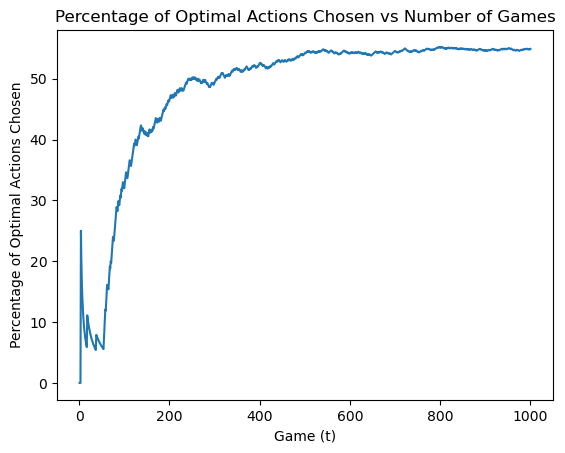

In [3]:
import random
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
b = int(input("Enter number of bandits: "))  # Number of arms (bandits)
t = int(input("Enter number of games: "))    # Number of games (iterations)
epsilon = float(input("Enter exploration probability epsilon (0 < ε < 1): "))  # Exploration probability

# Reward probabilities for each arm (randomly generated for this example)
true_rewards = [random.random() for _ in range(b)]
print(f"True rewards for each arm: {true_rewards}")

# Variables to track rewards and actions
Q = [0] * b  # Mean rewards estimate for each arm
n = [0] * b  # Number of times each arm has been pulled
optimal_action_count = 0  # Count of times optimal action is chosen
optimal_arm = np.argmax(true_rewards)  # The arm with the highest true reward

# Lists to store the percentage of optimal actions chosen over time
optimal_action_percentages = []

# Run the multi-armed bandit game
for game in range(1, t + 1):
    # Epsilon-greedy strategy: Choose random action with probability epsilon
    if random.random() < epsilon:
        action = random.randint(0, b - 1)
    else:
        # Choose the action with the highest Q value (exploitation)
        action = np.argmax(Q)
    
    # Check if the optimal arm was chosen
    if action == optimal_arm:
        optimal_action_count += 1
    
    # Get the reward for the chosen action (based on the true reward probability)
    reward = 1 if random.random() < true_rewards[action] else 0

    # Update the number of times this arm was chosen
    n[action] += 1

    # Update the mean reward estimate Q[action] using incremental formula
    Q[action] = Q[action] + (1 / n[action]) * (reward - Q[action])

    # Track the percentage of optimal actions chosen so far
    optimal_action_percentage = (optimal_action_count / game) * 100
    optimal_action_percentages.append(optimal_action_percentage)

# Plot the graph between t and percentage of optimal actions chosen
plt.plot(range(1, t + 1), optimal_action_percentages)
plt.xlabel('Game (t)')
plt.ylabel('Percentage of Optimal Actions Chosen')
plt.title('Percentage of Optimal Actions Chosen vs Number of Games')
plt.show()


Enter number of bandits:  10
Enter number of games:  1000
Enter exploration probability epsilon (0 < ε < 1):  0.5


True rewards for each arm: [0.3128508272779107, 0.36203644631559107, 0.678165016826433, 0.8055386684428331, 0.104520674868681, 0.4349160834814001, 0.3877608611195269, 0.01908868772216732, 0.30967168395911504, 0.7297048549051309]


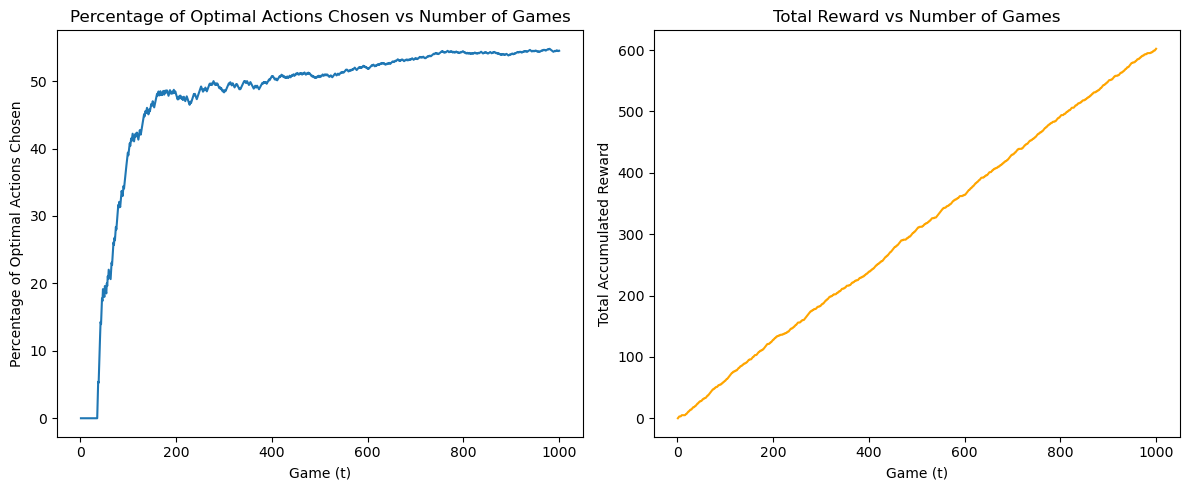

In [9]:
import random
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
b = int(input("Enter number of bandits: "))  # Number of arms (bandits)
t = int(input("Enter number of games: "))    # Number of games (iterations)
epsilon = float(input("Enter exploration probability epsilon (0 < ε < 1): "))  # Exploration probability

# Reward probabilities for each arm (randomly generated for this example)
true_rewards = [random.random() for _ in range(b)]
print(f"True rewards for each arm: {true_rewards}")

# Variables to track rewards and actions
Q = [0] * b  # Mean rewards estimate for each arm
n = [0] * b  # Number of times each arm has been pulled
total_reward = 0  # To track the total accumulated reward
optimal_action_count = 0  # Count of times optimal action is chosen
optimal_arm = np.argmax(true_rewards)  # The arm with the highest true reward

# Lists to store the percentage of optimal actions and total rewards over time
optimal_action_percentages = []
total_rewards = []

# Run the multi-armed bandit game
for game in range(1, t + 1):
    # Epsilon-greedy strategy: Choose random action with probability epsilon
    if random.random() < epsilon:
        action = random.randint(0, b - 1)
    else:
        # Choose the action with the highest Q value (exploitation)
        action = np.argmax(Q)
    
    # Check if the optimal arm was chosen
    if action == optimal_arm:
        optimal_action_count += 1
    
    # Get the reward for the chosen action (based on the true reward probability)
    reward = 1 if random.random() < true_rewards[action] else 0

    # Update the total accumulated reward
    total_reward += reward

    # Update the number of times this arm was chosen
    n[action] += 1

    # Update the mean reward estimate Q[action] using incremental formula
    Q[action] = Q[action] + (1 / n[action]) * (reward - Q[action])

    # Track the percentage of optimal actions chosen so far
    optimal_action_percentage = (optimal_action_count / game) * 100
    optimal_action_percentages.append(optimal_action_percentage)

    # Track the total reward after each game
    total_rewards.append(total_reward)

# Plot the graph between t and percentage of optimal actions chosen
plt.figure(figsize=(12, 5))

# Plot 1: Percentage of optimal actions chosen
plt.subplot(1, 2, 1)
plt.plot(range(1, t + 1), optimal_action_percentages)
plt.xlabel('Game (t)')
plt.ylabel('Percentage of Optimal Actions Chosen')
plt.title('Percentage of Optimal Actions Chosen vs Number of Games')

# Plot 2: Total reward over time
plt.subplot(1, 2, 2)
plt.plot(range(1, t + 1), total_rewards, color='orange')
plt.xlabel('Game (t)')
plt.ylabel('Total Accumulated Reward')
plt.title('Total Reward vs Number of Games')

# Show both plots
plt.tight_layout()
plt.show()


Enter number of bandits:  10
Enter number of games:  1000
Enter exploration probability epsilon (0 < ε < 1):  0.5


True rewards for each arm: [0.01928791377777128, 0.7289967999854182, 0.40813777794046613, 0.7964974101667549, 0.29168734134558605, 0.3168046228455572, 0.8603921070917672, 0.8454478361619198, 0.649435806662647, 0.07528477358030428]


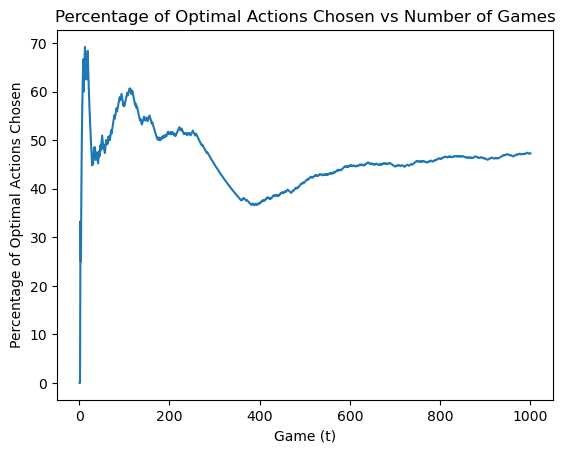

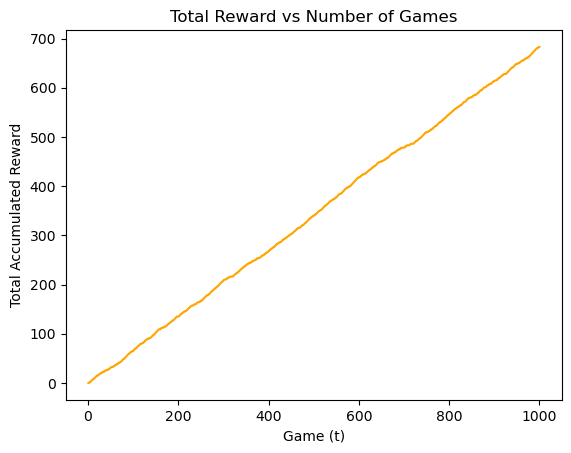

In [11]:
import random
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
b = int(input("Enter number of bandits: "))  # Number of arms (bandits)
t = int(input("Enter number of games: "))    # Number of games (iterations)
epsilon = float(input("Enter exploration probability epsilon (0 < ε < 1): "))  # Exploration probability

# Reward probabilities for each arm (randomly generated for this example)
true_rewards = [random.random() for _ in range(b)]
print(f"True rewards for each arm: {true_rewards}")

# Variables to track rewards and actions
Q = [0] * b  # Mean rewards estimate for each arm
n = [0] * b  # Number of times each arm has been pulled
total_reward = 0  # To track the total accumulated reward
optimal_action_count = 0  # Count of times optimal action is chosen
optimal_arm = np.argmax(true_rewards)  # The arm with the highest true reward

# Lists to store the percentage of optimal actions and total rewards over time
optimal_action_percentages = []
total_rewards = []

# Run the multi-armed bandit game
for game in range(1, t + 1):
    # Epsilon-greedy strategy: Choose random action with probability epsilon
    if random.random() < epsilon:
        action = random.randint(0, b - 1)
    else:
        # Choose the action with the highest Q value (exploitation)
        action = np.argmax(Q)
    
    # Check if the optimal arm was chosen
    if action == optimal_arm:
        optimal_action_count += 1
    
    # Get the reward for the chosen action (based on the true reward probability)
    reward = 1 if random.random() < true_rewards[action] else 0

    # Update the total accumulated reward
    total_reward += reward

    # Update the number of times this arm was chosen
    n[action] += 1

    # Update the mean reward estimate Q[action] using incremental formula
    Q[action] = Q[action] + (1 / n[action]) * (reward - Q[action])

    # Track the percentage of optimal actions chosen so far
    optimal_action_percentage = (optimal_action_count / game) * 100
    optimal_action_percentages.append(optimal_action_percentage)

    # Track the total reward after each game
    total_rewards.append(total_reward)

# Plot 1: Percentage of optimal actions chosen
plt.figure()
plt.plot(range(1, t + 1), optimal_action_percentages)
plt.xlabel('Game (t)')
plt.ylabel('Percentage of Optimal Actions Chosen')
plt.title('Percentage of Optimal Actions Chosen vs Number of Games')
plt.show()

# Plot 2: Total reward over time
plt.figure()
plt.plot(range(1, t + 1), total_rewards, color='orange')
plt.xlabel('Game (t)')
plt.ylabel('Total Accumulated Reward')
plt.title('Total Reward vs Number of Games')
plt.show()


Enter number of bandits (arms):  10
Enter number of games:  1000
Enter epsilon for exploration probability (0 to 1):  0.5


True reward probabilities: [0.3354867345567315, 0.46371625534473326, 0.7278176312729316, 0.14395002824788627, 0.7777588601995147, 0.2303738576743195, 0.7715302319194752, 0.6034508571347966, 0.7897937898751516, 0.10777546083547995]
Number of times Optimal action was chosen: 230


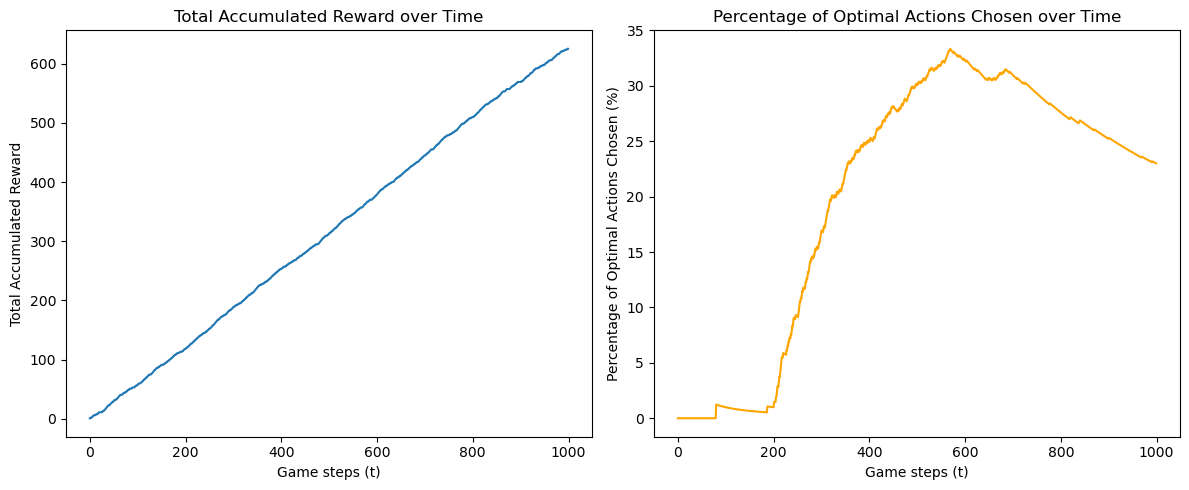

In [23]:
import random
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
b = int(input("Enter number of bandits (arms): "))
t = int(input("Enter number of games: "))
epsilon = float(input("Enter epsilon for exploration probability (0 to 1): "))

u = []       # True reward probabilities for each arm
n = []       # Count of times each arm has been pulled
Q = []       # Estimated Q-values (mean reward) for each arm
total_rewards = []  # Track total accumulated rewards over time
optimal_action_count = 0  # Count of how many times the optimal action is chosen

# Track the percentage of optimal actions chosen over time
optimal_action_percentages = []

# Initialize arm values
for i in range(b):
    u.append(random.uniform(0, 1))  # True reward distribution (random between 0 and 1)
    n.append(1)  # Initial count of pulling each arm (set to 1 to avoid division by 0)
    Q.append(0)  # Initial Q-value (estimated mean reward)
    
print("True reward probabilities:", u)

# Track UCB components and rewards
ucb_values = np.zeros(b)
accumulated_reward = 0

# Determine which arm is optimal (has the highest true reward probability)
optimal_arm = np.argmax(u)

# Main loop for each game (t-th step)
for step in range(1, t + 1):
    if random.uniform(0, 1) < epsilon:
        # Exploration: Choose a random arm with probability epsilon
        chosen_arm = random.randint(0, b - 1)
    else:
        # Exploitation: Choose the arm with the highest Q-value (exploitation)
        chosen_arm = np.argmax(Q)
    
    # Pull the chosen arm and get a reward from the true probability distribution
    reward = 1 if random.random() < u[chosen_arm] else 0
    accumulated_reward += reward
    total_rewards.append(accumulated_reward)
    
    # Check if the chosen arm is the optimal arm
    if chosen_arm == optimal_arm:
        optimal_action_count += 1
    
    # Calculate and store the percentage of optimal actions chosen so far
    optimal_action_percentage = (optimal_action_count / step) * 100
    optimal_action_percentages.append(optimal_action_percentage)
    
    # Update the number of times the arm was pulled
    n[chosen_arm] += 1
    
    # Update the estimated Q-value (mean reward) for the chosen arm
    Q[chosen_arm] += (reward - Q[chosen_arm]) / n[chosen_arm]
    
    # Update UCB values for each arm
    for i in range(b):
        exploration_component = 2 * np.sqrt(np.log(step) / n[i])
        ucb_values[i] = Q[i] + exploration_component

print("Number of times Optimal action was chosen:", optimal_action_count)

# Plot the total accumulated reward over time
plt.figure(figsize=(12, 5))

# First plot: Total accumulated reward
plt.subplot(1, 2, 1)
plt.plot(range(t), total_rewards)
plt.xlabel("Game steps (t)")
plt.ylabel("Total Accumulated Reward")
plt.title("Total Accumulated Reward over Time")

# Second plot: Percentage of optimal actions chosen over time
plt.subplot(1, 2, 2)
plt.plot(range(t), optimal_action_percentages, color='orange')
plt.xlabel("Game steps (t)")
plt.ylabel("Percentage of Optimal Actions Chosen (%)")
plt.title("Percentage of Optimal Actions Chosen over Time")

# Show the plots
plt.tight_layout()
plt.show()


Enter number of bandits (arms):  10
Enter number of games:  1000
Enter epsilon for exploration probability (0 to 1):  0.5


True reward probabilities: [0.6855593896616149, 0.025196987719515285, 0.9439267651029553, 0.37916606017280285, 0.8727199208098937, 0.43449278686382775, 0.12812881343803284, 0.6774308193485585, 0.8282472115515555, 0.05453623223406301]
Number of times Optimal action was chosen: 490


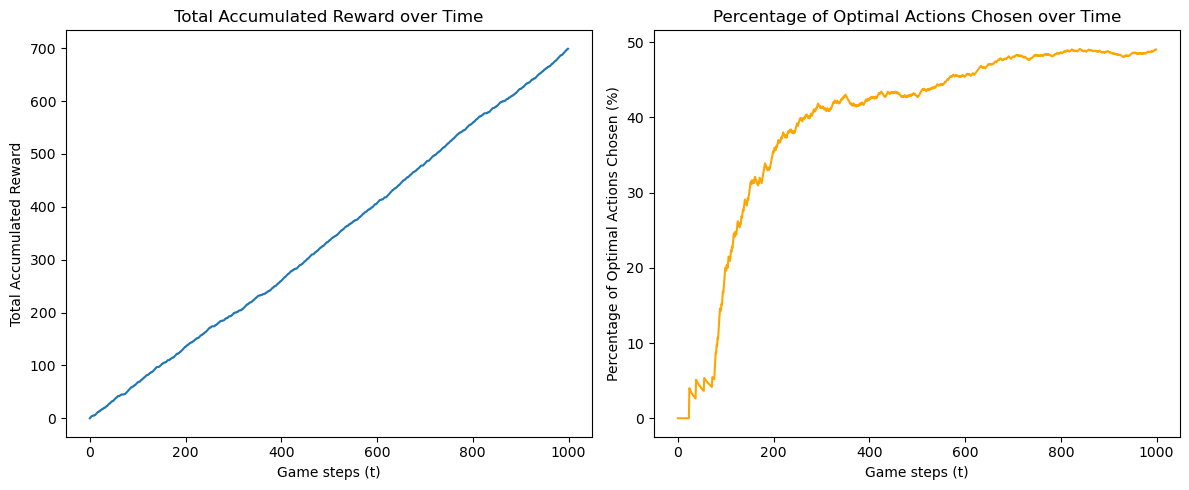

In [25]:
import random
import math as m
import numpy as np
import matplotlib.pyplot as plt

b = int(input("Enter number of bandits (arms): "))
t = int(input("Enter number of games: "))
epsilon = float(input("Enter epsilon for exploration probability (0 to 1): "))

u = []  
n = []      
Q = []       
total_rewards = [] 
optimal_action_count = 0 

optimal_action_percentages = []

for i in range(b):
    u.append(random.uniform(0, 1))
    n.append(1)
    Q.append(0) 
    
print("True reward probabilities:", u)

ucb_values = np.zeros(b)
accumulated_reward = 0

optimal_arm = np.argmax(u)

for step in range(1, t + 1):
    if random.uniform(0, 1) < epsilon:
        chosen_arm = random.randint(0, b - 1)
    else:
        chosen_arm = np.argmax(Q)
    
    reward = 1 if random.random() < u[chosen_arm] else 0
    accumulated_reward += reward
    total_rewards.append(accumulated_reward)
    
    # Check if the chosen arm is the optimal arm
    if chosen_arm == optimal_arm:
        optimal_action_count += 1
    
    # Calculate and store the percentage of optimal actions chosen so far
    optimal_action_percentage = (optimal_action_count / step) * 100
    optimal_action_percentages.append(optimal_action_percentage)
    
    # Update the number of times the arm was pulled
    n[chosen_arm] += 1
    
    # Update the estimated Q-value (mean reward) for the chosen arm
    Q[chosen_arm] += (reward - Q[chosen_arm]) / n[chosen_arm]
    
    # Update UCB values for each arm
    for i in range(b):
        exploration_component = 2 * np.sqrt(np.log(step) / n[i])
        ucb_values[i] = Q[i] + exploration_component

print("Number of times Optimal action was chosen:", optimal_action_count)

# Plot the total accumulated reward over time
plt.figure(figsize=(12, 5))

# First plot: Total accumulated reward
plt.subplot(1, 2, 1)
plt.plot(range(t), total_rewards)
plt.xlabel("Game steps (t)")
plt.ylabel("Total Accumulated Reward")
plt.title("Total Accumulated Reward over Time")

# Second plot: Percentage of optimal actions chosen over time
plt.subplot(1, 2, 2)
plt.plot(range(t), optimal_action_percentages, color='orange')
plt.xlabel("Game steps (t)")
plt.ylabel("Percentage of Optimal Actions Chosen (%)")
plt.title("Percentage of Optimal Actions Chosen over Time")

# Show the plots
plt.tight_layout()
plt.show()


Enter number of games:  1000


Optimal action percentage for 5 bandits: 21.40%
Optimal action percentage for 10 bandits: 32.20%
Optimal action percentage for 20 bandits: 3.20%
Optimal action percentage for 50 bandits: 0.00%


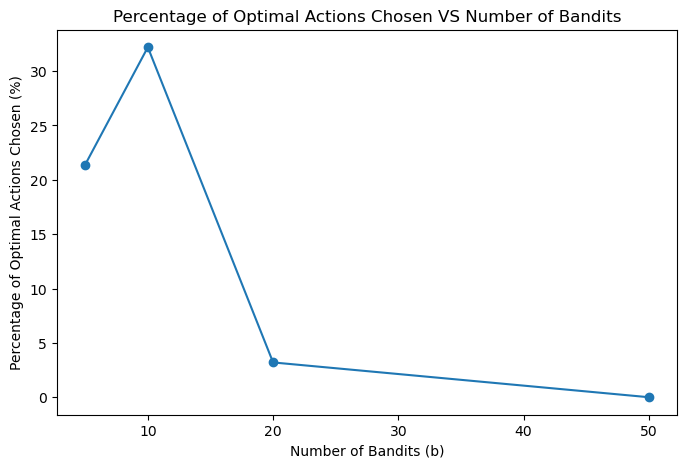

In [3]:
import random
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the multi-armed bandit for different number of bandits
def simulate_bandit(b, t):
    u = []      
    n = []       
    Q = []      
    total_rewards = [] 
    optimal_action_count = 0 
    optimal_action_percentages = []
    exploration_components = [[] for _ in range(b)]
    exploitation_components = [[] for _ in range(b)]
    ucb_components = [[] for _ in range(b)]
    epsilons = [random.uniform(0, 1) for _ in range(b)]

    # Initialize arm values
    for i in range(b):
        u.append(random.uniform(0, 1))  
        n.append(1)  
        Q.append(0) 

    optimal_arm = np.argmax(u)

    accumulated_reward = 0

    for step in range(1, t + 1):
        chosen_arm = None
        if random.uniform(0, 1) < epsilons[np.argmax(Q)]:
            chosen_arm = random.randint(0, b - 1)
        else:
            chosen_arm = np.argmax(Q)
        reward = 1 if random.random() < u[chosen_arm] else 0
        accumulated_reward += reward
        total_rewards.append(accumulated_reward)
        if chosen_arm == optimal_arm:
            optimal_action_count += 1
        optimal_action_percentage = (optimal_action_count / step) * 100
        optimal_action_percentages.append(optimal_action_percentage)
        n[chosen_arm] += 1
        Q[chosen_arm] += (reward - Q[chosen_arm]) / n[chosen_arm]
        for i in range(b):
            exploration_component = 2 * np.sqrt(np.log(step) / n[i])
            exploitation_component = Q[i]
            ucb_value = exploitation_component + exploration_component
            exploration_components[i].append(exploration_component)
            exploitation_components[i].append(exploitation_component)
            ucb_components[i].append(ucb_value)

    return optimal_action_percentages[-1]  # Return final percentage of optimal action chosen

# Parameters
t = int(input("Enter number of games: "))
bandit_values = [5, 10, 20, 50]  # Different numbers of bandits to try

# Store results
optimal_percentages_for_b = []

# Run simulations for different values of b
for b in bandit_values:
    final_optimal_percentage = simulate_bandit(b, t)
    optimal_percentages_for_b.append(final_optimal_percentage)
    print(f"Optimal action percentage for {b} bandits: {final_optimal_percentage:.2f}%")

# Plot 6: Percentage of times an optimal action is chosen as a function of b
plt.figure(figsize=(8, 5))
plt.plot(bandit_values, optimal_percentages_for_b, marker='o')
plt.xlabel("Number of Bandits (b)")
plt.ylabel("Percentage of Optimal Actions Chosen (%)")
plt.title("Percentage of Optimal Actions Chosen VS Number of Bandits")
plt.show()

# Existing Plots (1 to 5 as described previously) go here if needed...

